## Add RA/DEC mapping to rectified 2D spectra

In [22]:
import matplotlib, pylab, os, sys, astropy, copy
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import warnings
warnings.filterwarnings(action='ignore')
from astropy.io import fits
import astropy.units as u
from astropy.visualization import ImageNormalize, AsinhStretch, SqrtStretch, MinMaxInterval, ZScaleInterval
from regions import write_ds9,RectanglePixelRegion,RectangleSkyRegion,read_ds9
from astropy.wcs import WCS

path='/Users/dcohen/RESEARCH/NIRSPEC2017dec07/Reduction/'
tar='N1569/'#N1569/'
frameno=[98,99] 
#frameno=[86,87,88,89,90,94,95,96] # Maffei 2 on-target frames 
# stdimage = "HD12365/hd12365.fits"

hdus = [fits.open(tar+'spec/s%04d_corr.fits'%f)[0] for f in frameno]
slitfils=[tar+'scam/nscam_s%04d.slit.reg'%f for f in frameno]
# print(np.arange(1,159)-np.arange(1,159)[8:][0])
# print(78.83-(np.arange(1,159)[8:][0]))
ycent=70.83 # hoping this is right
ydelt=0.152

In [23]:
# loop through hdus and create wcs
for i in range(len(hdus)):
    
    h=hdus[i].copy()
    hdr=h.header
    
    reg=read_ds9(slitfils[i])[0]
    print(reg)
    # make slit width 0.432'', length=24''
#     reg.width=24.0*u.arcsec
#     reg.height=0.432*u.arcsec
# #     print(slitfils[i].split('.')[0][-4:])
#     reg.meta['text']="S%s"%slitfils[i].split('.')[0][-4:]
  #  write_ds9([reg],slitfils[i],coordsys='icrs')
    slitpa=reg.angle.value-90.
    slitcoord=reg.center
    print(slitcoord)
    
    # create output header/wcs
    odat=np.zeros([1,h.data.shape[0],h.data.shape[1]])
    odat[0,:,:]=h.data.copy()
    
    ohdu=fits.PrimaryHDU(odat)
    ohdr=ohdu.header
    
    # first deal with wavelength axis 
    ohdr['CTYPE1']=hdr['CTYPE1']
    ohdr['CRPIX1']=hdr['CRPIX1']
    ohdr['CRVAL1']=hdr['CRVAL1']
    ohdr['CUNIT1']=hdr['CUNIT1']
    ohdr['RESTWAV']=hdr['RESTWAV']
    ohdr['SPECSYS']=hdr['SPECSYS']
    ohdr['VHELIO']=hdr['VHELIO']
    
    pscale=ydelt # in arcsec
   # print(pscale)
    # now write ra/dec axes
    ohdr['RADESYS']='ICRS'
    ohdr['CUNIT2']='deg'
    ohdr['CUNIT3']='deg'
    ohdr['CTYPE2']='RA---TAN'
    ohdr['CRVAL2']=slitcoord.icrs.ra.degree
    ohdr['CRPIX2']=ycent
        
        
    ohdr['CTYPE3']='DEC--TAN'
    ohdr['CRVAL3']=slitcoord.icrs.dec.degree
    ohdr['CRPIX3']=1
    
    ohdr['CD1_1']=hdr['CDELT1']
    ohdr['CD1_2']=0.
    ohdr['CD2_1']=0.
    ohdr['CD1_3']=0.
    ohdr['CD3_1']=0.
    ohdr['CD2_2']=np.cos( (90.+slitpa)*np.pi/180.)*(pscale/3600.)
    ohdr['CD3_2']=-np.sin( (90.+slitpa)*np.pi/180.)*(pscale/3600.)
    ohdr['CD2_3']=1
    ohdr['CD3_3']=1

    owcs=WCS(ohdr)
    owcs.printwcs()
    #owcs.fix()
    fits.writeto(path+tar+'spec/s%04d_corr.reg.fits'%frameno[i], data=odat,\
                 header=ohdr,overwrite=True)
    
   # ocwcs=owcs.celestial
    
#     fig=plt.figure()
#     ax=fig.add_subplot(111,projection=ocwcs)
#     ax.imshow(odat[:,:,300])
#     plt.show()

Region: RectangleSkyRegion
center: <SkyCoord (ICRS): (ra, dec) in deg
    (67.69525, 64.850387)>
width: 0.006667 deg
height: 0.00012 deg
angle: 271.309949 deg
<SkyCoord (ICRS): (ra, dec) in deg
    (67.69525, 64.850387)>
WCS Keywords

Number of WCS axes: 3
CTYPE : 'WAVE'  'RA---TAN'  'DEC--TAN'  
CRVAL : 4.031761787349806e-06  67.69525  64.850387  
CRPIX : 1.0  69.83  1.0  
CD1_1 CD1_2 CD1_3  : 5.44001212654521e-11  0.0  0.0  
CD2_1 CD2_2 CD2_3  : 0.0  9.65239323376114e-07  1.0  
CD3_1 CD3_2 CD3_3  : 0.0  4.22111876453544e-05  1.0  
NAXIS : 1000  148  1
Region: RectangleSkyRegion
center: <SkyCoord (ICRS): (ra, dec) in deg
    (67.694856, 64.850387)>
width: 0.006667 deg
height: 0.00012 deg
angle: 269.38331 deg
<SkyCoord (ICRS): (ra, dec) in deg
    (67.694856, 64.850387)>
WCS Keywords

Number of WCS axes: 3
CTYPE : 'WAVE'  'RA---TAN'  'DEC--TAN'  
CRVAL : 4.031761730805419e-06  67.694856  64.850387  
CRPIX : 1.0  69.83  1.0  
CD1_1 CD1_2 CD1_3  : 5.440012050250679e-11  0.0  0.0  
CD2_1 

In [58]:
import sys

In [59]:
sys.path.insert(0,"/Users/dcohen/RESEARCH/PyNIRSPEC")

In [60]:
import spec_lib

In [61]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [62]:
import matplotlib, pylab, os, sys, astropy, copy
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import warnings
warnings.filterwarnings(action='ignore')
from astropy.io import fits
from astropy.visualization import ImageNormalize, AsinhStretch, SqrtStretch, MinMaxInterval, ZScaleInterval

### Make master normalized flat

In [68]:
flatlist=[rawpath+filpre+"%04d.fits"%n for n in flatframeno]
darklist=[rawpath+filpre+"%04d.fits"%n for n in darkframeno]

nflat=spec_lib.redflat(flatlist,outimage=redpath+"NFlatsub.fits",normalize=True,rectmap=redpath+"spec.map",\
                       norm_xrange= (0,1000), norm_thresh = 1000., clean=False, darkimage=darklist)#darklist)

Reducing and combining flat frames...
Cleaning and combining dark frames...


### Reduce standard star HD12365

Cleaning cosmic rays...
Cleaning cosmic rays...
Subtracting image pair and applying flat-field if specified...
Applying -8.01 heliocentric correction: 
[5.43985459e-05 5.43985459e-05 5.43985459e-05 ... 5.43985459e-05
 5.43985459e-05 5.43985459e-05]
Updating fits header...
SAVING FINAL REDUCED IMAGE AS HD12365/hd12365.1.fits


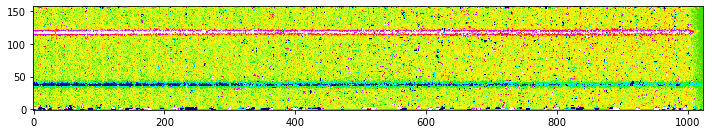

Cleaning cosmic rays...
Cleaning cosmic rays...
Subtracting image pair and applying flat-field if specified...
Applying -8.02 heliocentric correction: 
[5.43985453e-05 5.43985453e-05 5.43985453e-05 ... 5.43985453e-05
 5.43985453e-05 5.43985453e-05]
Updating fits header...
SAVING FINAL REDUCED IMAGE AS HD12365/hd12365.2.fits


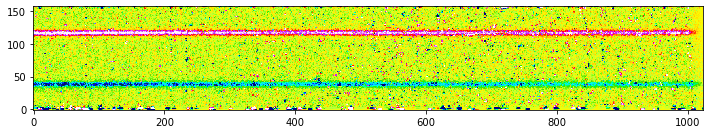

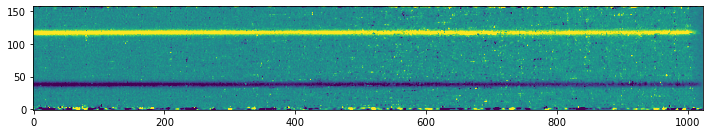

In [67]:
stdlist=[rawpath+'/'+filpre+"%04d.fits"%n for n in stdframeno]

outpath='HD12365/'
std1 = spec_lib.redspec(stdlist[1],outpath+'hd12365.1.fits',offimage=stdlist[0],flatimage=redpath+"NFlat.fits", target="HD12365",\
                        spatmap=redpath+'spat.map',specmap=redpath+'spec.map')
std2 = spec_lib.redspec(stdlist[2],outpath+'hd12365.2.fits',offimage=stdlist[3],flatimage=redpath+"NFlat.fits", target="HD12365",\
                        spatmap=redpath+'spat.map',specmap=redpath+'spec.map')
fits.writeto(outpath+"hd12365.fits", data=np.mean([std1.data,std2.data],0), header=std2.header, overwrite=True )
stdcorr = spec_lib.fringecor(np.mean([std1.data,std2.data],0),freq_bounds=[(35,48),(75,90),(115,130)])
fits.writeto(outpath+"hd12365.corr.fits",data=stdcorr,header=std2.header,overwrite=True)
#std2fr = spec_lib.redspec(stdlist[2],'HD12365/hd12365.2.corr.fits',offimage=stdlist[3],flatimage="NFlat.fits", target="HD12365",\
#                       fringe_corr=True,fringe_width=51,spatmap='spat.map',specmap='spec.map')

plt.figure(figsize=(12,4))
zlim=ZScaleInterval().get_limits(stdcorr)
plt.imshow(stdcorr,origin='lower',vmin=zlim[0],vmax=zlim[1])
plt.show()

### Reduce Maffei 2

First run with full capability, including background subtraction+fringe correction. Then run without bg sub or fringe. Finally, try with just fringe.

Object frame:  /Users/dcohen/RESEARCH/NIRSPEC2017dec07/Data/2017dec07/spec/dec07s0086.fits
Object spectrum /Users/dcohen/RESEARCH/NIRSPEC2017dec07/Data/2017dec07/spec/dec07s0086.fits, taken at (time,airmass): 58094.35377,  1.30677
Using sky spectrum /Users/dcohen/RESEARCH/NIRSPEC2017dec07/Data/2017dec07/spec/dec07s0091.fits, taken at (time,airmass): 58094.37769,  1.33194
Cleaning cosmic rays...
Cleaning cosmic rays...
Subtracting image pair and applying flat-field if specified...
Applying -6.45 heliocentric correction: 
[5.43988294e-05 5.43988294e-05 5.43988294e-05 ... 5.43988294e-05
 5.43988294e-05 5.43988294e-05]
Updating fits header...
SAVING FINAL REDUCED IMAGE AS /Users/dcohen/RESEARCH/NIRSPEC2017dec07/Reduction/Maf2/spec/s0086.fits


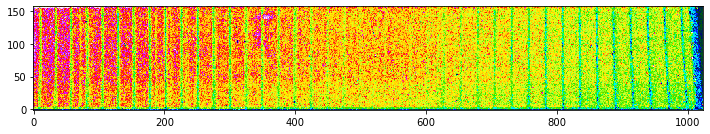

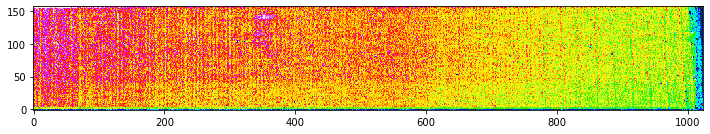

Object frame:  /Users/dcohen/RESEARCH/NIRSPEC2017dec07/Data/2017dec07/spec/dec07s0087.fits
Object spectrum /Users/dcohen/RESEARCH/NIRSPEC2017dec07/Data/2017dec07/spec/dec07s0087.fits, taken at (time,airmass): 58094.3585,  1.31026
Using sky spectrum /Users/dcohen/RESEARCH/NIRSPEC2017dec07/Data/2017dec07/spec/dec07s0091.fits, taken at (time,airmass): 58094.37769,  1.33194
Cleaning cosmic rays...
Cleaning cosmic rays...
Subtracting image pair and applying flat-field if specified...
Applying -6.46 heliocentric correction: 
[5.43988279e-05 5.43988279e-05 5.43988279e-05 ... 5.43988279e-05
 5.43988279e-05 5.43988279e-05]
Updating fits header...
SAVING FINAL REDUCED IMAGE AS /Users/dcohen/RESEARCH/NIRSPEC2017dec07/Reduction/Maf2/spec/s0087.fits


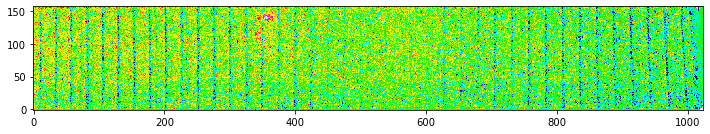

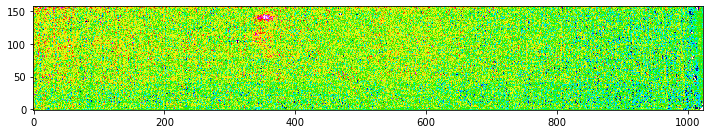

Object frame:  /Users/dcohen/RESEARCH/NIRSPEC2017dec07/Data/2017dec07/spec/dec07s0088.fits
Object spectrum /Users/dcohen/RESEARCH/NIRSPEC2017dec07/Data/2017dec07/spec/dec07s0088.fits, taken at (time,airmass): 58094.36259,  1.31383
Using sky spectrum /Users/dcohen/RESEARCH/NIRSPEC2017dec07/Data/2017dec07/spec/dec07s0091.fits, taken at (time,airmass): 58094.37769,  1.33194
Cleaning cosmic rays...
Cleaning cosmic rays...
Subtracting image pair and applying flat-field if specified...
Applying -6.47 heliocentric correction: 
[5.43988265e-05 5.43988266e-05 5.43988266e-05 ... 5.43988266e-05
 5.43988266e-05 5.43988266e-05]
Updating fits header...
SAVING FINAL REDUCED IMAGE AS /Users/dcohen/RESEARCH/NIRSPEC2017dec07/Reduction/Maf2/spec/s0088.fits


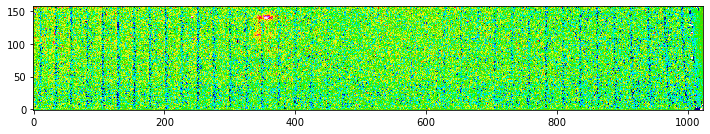

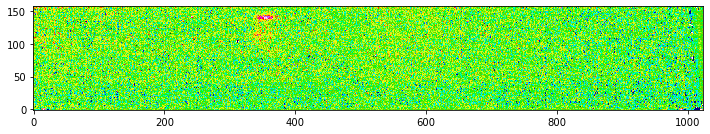

Object frame:  /Users/dcohen/RESEARCH/NIRSPEC2017dec07/Data/2017dec07/spec/dec07s0089.fits
Object spectrum /Users/dcohen/RESEARCH/NIRSPEC2017dec07/Data/2017dec07/spec/dec07s0089.fits, taken at (time,airmass): 58094.36712,  1.31844
Using sky spectrum /Users/dcohen/RESEARCH/NIRSPEC2017dec07/Data/2017dec07/spec/dec07s0091.fits, taken at (time,airmass): 58094.37769,  1.33194
Cleaning cosmic rays...
Cleaning cosmic rays...
Subtracting image pair and applying flat-field if specified...
Applying -6.47 heliocentric correction: 
[5.43988251e-05 5.43988251e-05 5.43988251e-05 ... 5.43988251e-05
 5.43988251e-05 5.43988251e-05]
Updating fits header...
SAVING FINAL REDUCED IMAGE AS /Users/dcohen/RESEARCH/NIRSPEC2017dec07/Reduction/Maf2/spec/s0089.fits


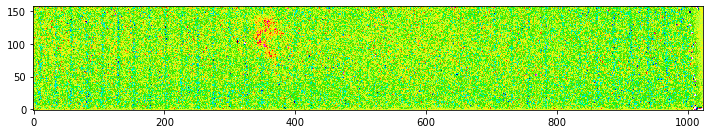

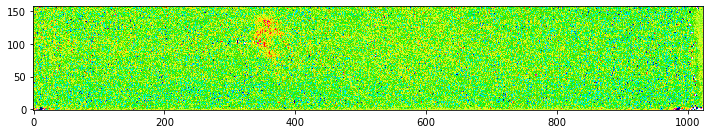

Object frame:  /Users/dcohen/RESEARCH/NIRSPEC2017dec07/Data/2017dec07/spec/dec07s0090.fits
Object spectrum /Users/dcohen/RESEARCH/NIRSPEC2017dec07/Data/2017dec07/spec/dec07s0090.fits, taken at (time,airmass): 58094.37112,  1.3231
Using sky spectrum /Users/dcohen/RESEARCH/NIRSPEC2017dec07/Data/2017dec07/spec/dec07s0091.fits, taken at (time,airmass): 58094.37769,  1.33194
Cleaning cosmic rays...
Cleaning cosmic rays...
Subtracting image pair and applying flat-field if specified...
Applying -6.48 heliocentric correction: 
[5.43988239e-05 5.43988239e-05 5.43988239e-05 ... 5.43988239e-05
 5.43988239e-05 5.43988239e-05]
Updating fits header...
SAVING FINAL REDUCED IMAGE AS /Users/dcohen/RESEARCH/NIRSPEC2017dec07/Reduction/Maf2/spec/s0090.fits


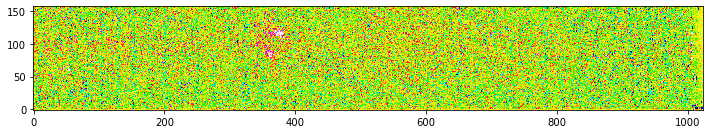

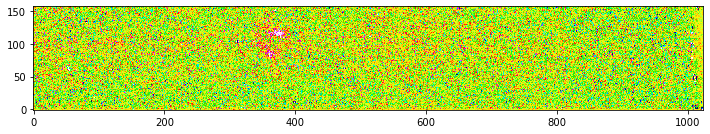

Object frame:  /Users/dcohen/RESEARCH/NIRSPEC2017dec07/Data/2017dec07/spec/dec07s0094.fits
Object spectrum /Users/dcohen/RESEARCH/NIRSPEC2017dec07/Data/2017dec07/spec/dec07s0094.fits, taken at (time,airmass): 58094.39083,  1.3541
Using sky spectrum /Users/dcohen/RESEARCH/NIRSPEC2017dec07/Data/2017dec07/spec/dec07s0093.fits, taken at (time,airmass): 58094.38576,  1.34481
Cleaning cosmic rays...
Cleaning cosmic rays...
Subtracting image pair and applying flat-field if specified...
Applying -6.52 heliocentric correction: 
[5.43988177e-05 5.43988177e-05 5.43988177e-05 ... 5.43988177e-05
 5.43988177e-05 5.43988177e-05]
Updating fits header...
SAVING FINAL REDUCED IMAGE AS /Users/dcohen/RESEARCH/NIRSPEC2017dec07/Reduction/Maf2/spec/s0094.fits


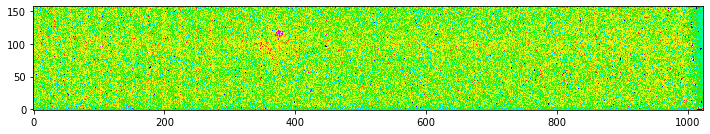

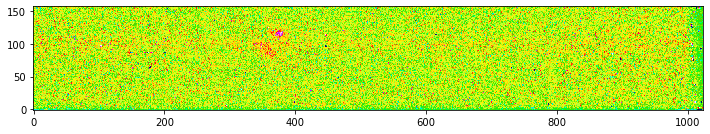

Object frame:  /Users/dcohen/RESEARCH/NIRSPEC2017dec07/Data/2017dec07/spec/dec07s0095.fits
Object spectrum /Users/dcohen/RESEARCH/NIRSPEC2017dec07/Data/2017dec07/spec/dec07s0095.fits, taken at (time,airmass): 58094.39451,  1.36144
Using sky spectrum /Users/dcohen/RESEARCH/NIRSPEC2017dec07/Data/2017dec07/spec/dec07s0093.fits, taken at (time,airmass): 58094.38576,  1.34481
Cleaning cosmic rays...
Cleaning cosmic rays...
Subtracting image pair and applying flat-field if specified...
Applying -6.52 heliocentric correction: 
[5.43988166e-05 5.43988166e-05 5.43988166e-05 ... 5.43988166e-05
 5.43988166e-05 5.43988166e-05]
Updating fits header...
SAVING FINAL REDUCED IMAGE AS /Users/dcohen/RESEARCH/NIRSPEC2017dec07/Reduction/Maf2/spec/s0095.fits


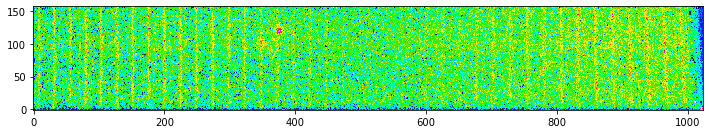

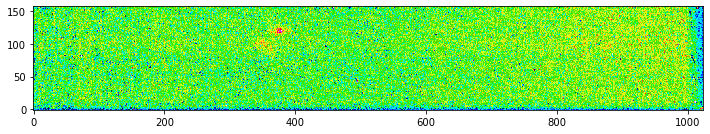

Object frame:  /Users/dcohen/RESEARCH/NIRSPEC2017dec07/Data/2017dec07/spec/dec07s0096.fits
Object spectrum /Users/dcohen/RESEARCH/NIRSPEC2017dec07/Data/2017dec07/spec/dec07s0096.fits, taken at (time,airmass): 58094.39948,  1.37228
Using sky spectrum /Users/dcohen/RESEARCH/NIRSPEC2017dec07/Data/2017dec07/spec/dec07s0093.fits, taken at (time,airmass): 58094.38576,  1.34481
Cleaning cosmic rays...
Cleaning cosmic rays...
Subtracting image pair and applying flat-field if specified...
Applying -6.53 heliocentric correction: 
[5.43988151e-05 5.43988151e-05 5.43988151e-05 ... 5.43988151e-05
 5.43988151e-05 5.43988151e-05]
Updating fits header...
SAVING FINAL REDUCED IMAGE AS /Users/dcohen/RESEARCH/NIRSPEC2017dec07/Reduction/Maf2/spec/s0096.fits


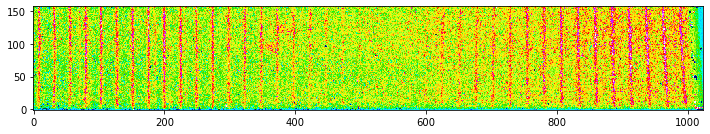

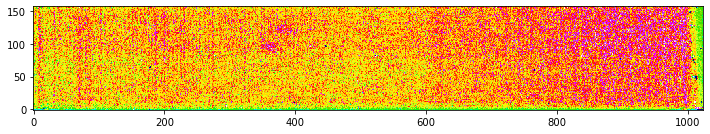

In [78]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [20,15]

tar='Maf2'
objlist=[rawpath+filpre+"%04d.fits"%n for n in maf2frameno]
fflat=redpath+"NFlat.fits"
#fflat=rawpath+"Flats/flat_norm.fits"#NFlat.fits"
#fsky=rawpath+filpre+"0097.fits"
#fsky=rawpath+"Sky/maf2_sky_avg.fits"#filpre+"0097.fits"
skylist=[rawpath+filpre+"%04d.fits"%n for n in skyframeno]
ixsky=[0,0,0,0,0,2,2,2]
tsky=[fits.getheader(f)['mjd-obs'] for f in skylist]
amsky=[fits.getheader(f)['airmass'] for f in skylist]


outdir=redpath+tar+'/'


inum=0
for f in objlist:
    # find closest sky exposure\
    print("Object frame: ",f)
    tobj=fits.getheader(f)['mjd-obs']
    amobj=fits.getheader(f)['airmass']
#     tsky=fits.getheader(fsky)['utc']
#     amsky=fits.getheader(fsky)['airmass']
   # isky=np.argmin( np.abs( np.array(tobj) - np.array(tsky) ))
    #iam=np.argmin( np.abs( np.array(amobj) - np.array(amsky) ))
    #fsky=skylist[iam]
    isky=ixsky[inum]
    print("Object spectrum %s, taken at (time,airmass): %s,  %s"%(f,tobj,amobj))
    print("Using sky spectrum %s, taken at (time,airmass): %s,  %s"%(skylist[isky],tsky[isky],amsky[isky]))
    outname=outdir+'spec/'+f[-10:-5]
   # print(outname)
    obj = spec_lib.redspec(f,outname+".fits",offimage=skylist[isky],flatimage=fflat, target="Maffei 2",bkg_subtract=False,fringe_corr=False,\
                          spatmap=redpath+'spat.map',specmap=redpath+'spec.map', restwav=4.05226)
    
    datcorr = spec_lib.fringecor(obj.data,freq_bounds=[(35,48),(75,90),(115,130)])
    
    fits.writeto(outname+".corr.fits",data=datcorr,header=obj.header,overwrite=True)
    
    inum+=1
    
    # DISPLAY REDUCED SPECTRUM
    fig=plt.figure(figsize=(12,4))
    ax=fig.add_subplot(111)
    zlim=ZScaleInterval().get_limits(datcorr)
    ax.imshow(datcorr,origin='lower',interpolation='None',cmap='gist_ncar',vmin=zlim[0],vmax=zlim[1])
    plt.show()
   

## NGC 1569

Object frame:  /Users/dcohen/RESEARCH/NIRSPEC2017dec07/Data/2017dec07/spec/dec07s0098.fits
Object spectrum /Users/dcohen/RESEARCH/NIRSPEC2017dec07/Data/2017dec07/spec/dec07s0098.fits, taken at (time,airmass): 58094.41363,  1.41257
Using sky spectrum /Users/dcohen/RESEARCH/NIRSPEC2017dec07/Data/2017dec07/spec/dec07s0100.fits, taken at (time,airmass): 58094.4216,  1.41459
Cleaning cosmic rays...
Cleaning cosmic rays...
Subtracting image pair and applying flat-field if specified...
Applying 0.67 heliocentric correction: 
[5.44001213e-05 5.44001213e-05 5.44001213e-05 ... 5.44001213e-05
 5.44001213e-05 5.44001213e-05]
Updating fits header...
SAVING FINAL REDUCED IMAGE AS /Users/dcohen/RESEARCH/NIRSPEC2017dec07/Reduction/N1569/spec/s0098.fits


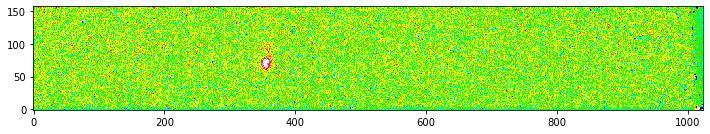

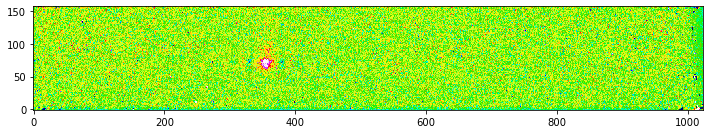

Object frame:  /Users/dcohen/RESEARCH/NIRSPEC2017dec07/Data/2017dec07/spec/dec07s0099.fits
Object spectrum /Users/dcohen/RESEARCH/NIRSPEC2017dec07/Data/2017dec07/spec/dec07s0099.fits, taken at (time,airmass): 58094.41758,  1.41339
Using sky spectrum /Users/dcohen/RESEARCH/NIRSPEC2017dec07/Data/2017dec07/spec/dec07s0100.fits, taken at (time,airmass): 58094.4216,  1.41459
Cleaning cosmic rays...
Cleaning cosmic rays...
Subtracting image pair and applying flat-field if specified...
Applying 0.66 heliocentric correction: 
[5.44001201e-05 5.44001201e-05 5.44001201e-05 ... 5.44001201e-05
 5.44001201e-05 5.44001201e-05]
Updating fits header...
SAVING FINAL REDUCED IMAGE AS /Users/dcohen/RESEARCH/NIRSPEC2017dec07/Reduction/N1569/spec/s0099.fits


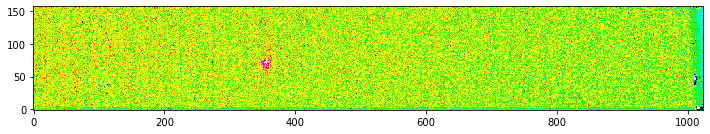

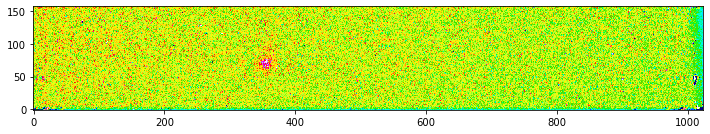

In [82]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [20,15]

tar='N1569'
objlist=[rawpath+filpre+"%04d.fits"%n for n in n1569frameno]
fflat=redpath+"NFlat.fits"
#fflat=rawpath+"Flats/flat_norm.fits"#NFlat.fits"
#fsky=rawpath+filpre+"0097.fits"
#fsky=rawpath+"Sky/maf2_sky_avg.fits"#filpre+"0097.fits"
skylist=[rawpath+filpre+"%04d.fits"%n for n in skyframeno]
tsky=[fits.getheader(f)['mjd-obs'] for f in skylist]
amsky=[fits.getheader(f)['airmass'] for f in skylist]

isky=-1
#ixsky=[-2,-1,-2]
outdir=redpath+tar+'/'
#inum=0
for f in objlist:
    # find closest sky exposure\
    print("Object frame: ",f)
    tobj=fits.getheader(f)['mjd-obs']
    amobj=fits.getheader(f)['airmass']
#     tsky=fits.getheader(fsky)['utc']
#     amsky=fits.getheader(fsky)['airmass']
#     isky=np.argmin( np.abs( np.array(tobj) - np.array(tsky) ))
#     iam=np.argmin( np.abs( np.array(amobj) - np.array(amsky) ))
    #fsky=skylist[iam]
   # isky=ixsky[inum]
    print("Object spectrum %s, taken at (time,airmass): %s,  %s"%(f,tobj,amobj))
    print("Using sky spectrum %s, taken at (time,airmass): %s,  %s"%(skylist[isky],tsky[isky],amsky[isky]))
    outname=outdir+'spec/'+f[-10:-5]
   # print(outname)
    obj = spec_lib.redspec(f,outname+".fits",offimage=skylist[isky],flatimage=fflat, target="NGC1569",bkg_subtract=False,fringe_corr=False,\
                          spatmap=redpath+'spat.map',specmap=redpath+'spec.map', restwav=4.05226)
    
    datcorr = spec_lib.fringecor(obj.data,freq_bounds=[(35,48),(75,90),(115,130)])
    
    fits.writeto(outname+".corr.fits",data=datcorr,header=obj.header,overwrite=True)
    
    #inum+=1
    
    # DISPLAY REDUCED SPECTRUM
    fig=plt.figure(figsize=(12,4))
    ax=fig.add_subplot(111)
    zlim=ZScaleInterval().get_limits(datcorr)
    ax.imshow(datcorr,origin='lower',interpolation='None',cmap='gist_ncar',vmin=zlim[0],vmax=zlim[1])
    plt.show()

## Do SCAM reduction, grouped by slit position

In [ ]:
from ccdproc import ImageFileCollection

scampath='/Users/dcohen/RESEARCH/NIRSPEC2017dec07/Data/2017dec07/scam/'
scampre='dec07i'
skyic= ImageFileCollection(filenames=[rawpath+filpre+"%04d.fits"%n for n in skyframeno])#,keywords=['ofname','framenum','elaptime',\
maf2ic= ImageFileCollection(filenames=[rawpath+filpre+"%04d.fits"%n for n in maf2frameno])#       'utstart','utend','mjd-obs','date-obs'])
n1569ic= ImageFileCollection(filenames=[rawpath+filpre+"%04d.fits"%n for n in n1569frameno])
scamic= ImageFileCollection(scampath,glob_include=scampre+'*.fits')

In [ ]:
# make slit region/mask
scamfiles=[scampath+f for f in scamic.files]
# plt.imshow(1-slit,origin='lower',cmap='binary')
# plt.show()

### Get SCAM sky frames, group and average according to slit position and make a list of averaged sky frames

In [ ]:
# assuming scamic is defined to be the image collection of ALL scam images (sci+sky)
from astropy.time import Time
from astropy.stats import sigma_clipped_stats,sigma_clip,mad_std
import astropy.units as u

#skylist=['nscam_avg_s%04d.fits'%n for n in (91,92,93,97)]
#skydat=np.array([fits.getdata(f) for f in skylist])
#skydat=fits.getdata(scampath+"Sky2.fits")
sky=fits.getdata("./N1569/scam/sky.fits")
#skyall=fits.getdata(scampath+"Skymast.fits")#"./Maf2/scam/Sky.2.fits")
#skyflat=fits.getdata(scampath+"NSkyflat.fits")
#tsky=np.array([Time(fits.getheader(f)['mjd-avg'],format='mjd').to_value('mjd','long') for f in skylist])
pathout="./Maf2/scam/"
for fspec in maf2ic.files:
    
    #~~ SPEC FILE 
    hsp=fits.getheader(fspec)

    # FIND SCAM IMAGE MATCHES
    matches=spec_lib.match_spec_scam(fspec, scamfiles)
    print("Num matches: ",np.size(np.where(matches==True)))
    #print(matches)
    ixmatch=np.where(matches==True)[0]
  #  print(ixmatch)
    matchfiles=np.array(scamfiles)[ixmatch]
   # matchfiles=scamic.files[np.where(matches==True)]
    #matchic=scam[matches]
    print(matchfiles)
   # print(matchic.summary['framenum'])
    
    #~~ Reduce and combine matched SCAM frames for sky images
    images=[]
    masks=[]
    mjdobs=[]
    framenums=[]
    for f in matchfiles:
        slitreg,slitmask=spec_lib.mkslit(f)
        h=fits.open(f)[0]
        dat=h.data
        hdr=h.header
        tobs=(Time(hdr['date-obs']+'T'+hdr['utc'],scale='utc') + hdr['elaptime']*u.s ).to_value('mjd','long')
        mjdobs.append(tobs)
        framenums.append(hdr['frameno'])
        # clean cosmics from sky   
       # dat,cr=spec_lib.cosmic_clean(dat.copy(),sigclip=5.0,sigfrac=0.1,mask=slit)
       # sky,crsky=spec_lib.cosmic_clean(skydat,mask=slit)
        
        #fits.writeto(pathout+fname[-9:-5]+"sub.fits",data=dat,header=hdr,overwrite=True)
      #  skysky=skydat-skyall
        datsub = dat - sky
        mean,med,std=sigma_clipped_stats(datsub,mask=slitmask,sigma_lower=2.0,sigma_upper=5.0,\
                                         cenfunc=np.nanmedian,stdfunc=np.nanstd,maxiters=10)     
        offmask = datsub < med-std
        bpmask = offmask | slitmask
      
       # datred=datsub # set masked pixels to 0
        meanbg,bg,bgstd=sigma_clipped_stats(datsub,mask=bpmask,sigma_lower=5.0,sigma_upper=5.0,\
                                         cenfunc=np.nanmedian,stdfunc=np.nanstd,maxiters=10) 
        #datred,cr=spec_lib.cosmic_clean(datred,mask=bpmask,sigfrac=0.2,sigclip=10.0,objlim=20.0)
        #datsub,crmask=spec_lib.cosmic_clean(datsub,mask=bpmask,sigclip=10.0,sigfrac=0.5)
        datred=datsub-bg
        datred[np.where(bpmask==True)]=np.nan
        images.append(np.ma.masked_array(datred,mask=bpmask))
        #masks.append(bpmask)
        # find best sky to use and subtract
#         dt= tobs - tsky
#         isky=np.argmin(np.abs(dt))
#         sdat=skydat[isky]
        
        # try to mask sources in the sky frame before subtraction. do by forming sky - data, masking all negative pixels
        # and detecting sources
        #datcl,bpmask=spec_lib.cosmic_clean(datsub,sigclip=5.0,sigfrac=0.2,mask=slit)
#         skysubdat=sdat-dat
#         meansky,medsky,stdsky=sigma_clipped_stats(np.ma.masked_array(sdat,mask=slit), sigma_lower=4.0,sigma_upper=4.0,maxiters=5,cenfunc=np.nanmedian,\
#                           stdfunc=np.nanstd)
#         print(meansky,medsky)
#         skysources=skysubdat>=(medsky + 1.0*stdsky)
#         skyclip=sigma_clip(np.ma.masked_array(skysubdat,mask=slit), sigma_lower=0.,sigma_upper=2.5,maxiters=3,cenfunc=np.nanmedian,\
#                           stdfunc=np.nanstd)
#         plt.figure()
#         ax1=plt.subplot(121)
#         zlim=ZScaleInterval().get_limits(datsub)
#         ax1.imshow(datsub*(1-bpmask.astype(int)),origin='lower',vmin=zlim[0],vmax=zlim[1])
#         ax2=plt.subplot(122)
#         zlim=ZScaleInterval().get_limits(skydat-skyall)
#         ax2.imshow(skydat-dat,origin='lower',vmin=zlim[0],vmax=zlim[1])
#         plt.show()
        
        #meansky,medsky,stdsky=SigmaClip(sdat,mask=slit,cenfunc=np.nanmedian,\
        #                                      stdfunc=np.nanstd,sigma_lower=1.0,sigma_upper=2.0,maxiters=5)
        #smask=sdat >= (medsky + 2.0*stdsky) # non-soruce bckground, to be subtracted
        #sdat*= (1-smask.astype(int))
        
       # dat=dat-skyclip 
        
        #nmask=dat<=-0.
        
        # subtract residual median bkg
       # meanbg,medbg,stdbg=sigma_clipped_stats(dat,mask=(smask|slit),cenfunc=np.nanmedian,\
          #                                    stdfunc=np.nanstd,sigma_lower=5.0,sigma_upper=1.5,maxiters=5)
        
   #     images.append(np.ma.masked_array(dat,mask=dat<0.) )# np.ma.masked_array(datred,mask=bpmask ) )
       # masks.append( bpmask )
        #masks.append( crmask )
        #mjd.append(hdu.header['mjd-obs'])
    imcomb=np.ma.median(images,axis=0)
    #imcomb.data[np.where(np.isnan(imcomb.data)==True)]=0.
    hdrcomb=hdr.copy()
    #hdrcomb['framenum']=hsp['framenum']
    hdrcomb['frameno']=hsp['frameno']
    hdrcomb['mjd-obs']=hsp['mjd-obs']
    hdrcomb['mjd-avg']=np.mean( tobs )
    hdrcomb['exptime']=hdr['elaptime']
    hdrcomb['history']='Images combined: '
    for f in matchfiles:
        hdrcomb[''] = f
    outname='nscam_s%04d.fits'%hsp['frameno']
    fits.writeto(pathout+outname,data=imcomb.data,header=hdrcomb,overwrite=True)

In [ ]:
# assuming scamic is defined to be the image collection of ALL scam images (sci+sky)
from astropy.time import Time
from astropy.stats import sigma_clipped_stats,sigma_clip
import astropy.units as u

#skylist=['nscam_avg_s%04d.fits'%n for n in (91,92,93,97)]
#skydat=np.array([fits.getdata(f) for f in skylist])
#skydat=fits.getdata(scampath+"Sky2.fits")
sky=fits.getdata("./N1569/scam/sky.fits")
#skyflat=fits.getdata(scampath+"NSkyflat.fits")
#tsky=np.array([Time(fits.getheader(f)['mjd-avg'],format='mjd').to_value('mjd','long') for f in skylist])
pathout="./N1569/scam/"
for fspec in n1569ic.files:
    
    #~~ SPEC FILE 
    hsp=fits.getheader(fspec)

    # FIND SCAM IMAGE MATCHES
    matches=spec_lib.match_spec_scam(fspec, scamfiles)
    print("Num matches: ",np.size(np.where(matches==True)))
    #print(matches)
    ixmatch=np.where(matches==True)[0]
  #  print(ixmatch)
    matchfiles=np.array(scamfiles)[ixmatch]
   # matchfiles=scamic.files[np.where(matches==True)]
    #matchic=scam[matches]
    print(matchfiles)
   # print(matchic.summary['framenum'])
    
    #~~ Reduce and combine matched SCAM frames for sky images
    images=[]
    mjdobs=[]
    framenums=[]
    for f in matchfiles:
        slitreg,slitmask=spec_lib.mkslit(f)
        h=fits.open(f)[0]
        dat=h.data
        hdr=h.header
        tobs=(Time(hdr['date-obs']+'T'+hdr['utc'],scale='utc') + hdr['elaptime']*u.s ).to_value('mjd','long')
        mjdobs.append(tobs)
        framenums.append(hdr['frameno'])
        # clean cosmics from sky   
        #dat,bpmask=spec_lib.cosmic_clean(dat.copy(),sigclip=5.0,sigfrac=0.2,mask=slit)

        #fits.writeto(pathout+fname[-9:-5]+"sub.fits",data=dat,header=hdr,overwrite=True)
      #  skysky=skydat-skyall
        datsub = dat - sky
        mean,med,std=sigma_clipped_stats(datsub,mask=slitmask,sigma_lower=2.0,sigma_upper=5.0,\
                                         cenfunc=np.nanmedian,stdfunc=np.nanstd,maxiters=10)     
        offmask = datsub < med-std
        bpmask = offmask | slitmask
      
       # datred=datsub # set masked pixels to 0
        meanbg,bg,bgstd=sigma_clipped_stats(datsub,mask=bpmask,sigma_lower=5.0,sigma_upper=5.0,\
                                         cenfunc=np.nanmedian,stdfunc=np.nanstd,maxiters=10) 
        #datred,cr=spec_lib.cosmic_clean(datred,mask=bpmask,sigfrac=0.2,sigclip=10.0,objlim=20.0)
        #datsub,crmask=spec_lib.cosmic_clean(datsub,mask=bpmask,sigclip=10.0,sigfrac=0.5)
        datred=datsub-bg
        datred[np.where(bpmask==True)]=np.nan
        images.append(np.ma.masked_array(datred,mask=bpmask))
        #masks.append(bpmask)
        # find best sky to use and subtract
#         dt= tobs - tsky
#         isky=np.argmin(np.abs(dt))
#         sdat=skydat[isky]
        
        # try to mask sources in the sky frame before subtraction. do by forming sky - data, masking all negative pixels
        # and detecting sources
        #datcl,bpmask=spec_lib.cosmic_clean(datsub,sigclip=5.0,sigfrac=0.2,mask=slit)
#         skysubdat=sdat-dat
#         meansky,medsky,stdsky=sigma_clipped_stats(np.ma.masked_array(sdat,mask=slit), sigma_lower=4.0,sigma_upper=4.0,maxiters=5,cenfunc=np.nanmedian,\
#                           stdfunc=np.nanstd)
#         print(meansky,medsky)
#         skysources=skysubdat>=(medsky + 1.0*stdsky)
#         skyclip=sigma_clip(np.ma.masked_array(skysubdat,mask=slit), sigma_lower=0.,sigma_upper=2.5,maxiters=3,cenfunc=np.nanmedian,\
#                           stdfunc=np.nanstd)
#         plt.figure()
#         ax1=plt.subplot(121)
#         zlim=ZScaleInterval().get_limits(datsub)
#         ax1.imshow(datsub*(1-bpmask.astype(int)),origin='lower',vmin=zlim[0],vmax=zlim[1])
#         ax2=plt.subplot(122)
#         zlim=ZScaleInterval().get_limits(skydat-skyall)
#         ax2.imshow(skydat-dat,origin='lower',vmin=zlim[0],vmax=zlim[1])
#         plt.show()
        
        #meansky,medsky,stdsky=SigmaClip(sdat,mask=slit,cenfunc=np.nanmedian,\
        #                                      stdfunc=np.nanstd,sigma_lower=1.0,sigma_upper=2.0,maxiters=5)
        #smask=sdat >= (medsky + 2.0*stdsky) # non-soruce bckground, to be subtracted
        #sdat*= (1-smask.astype(int))
        
       # dat=dat-skyclip 
        
        #nmask=dat<=-0.
        
        # subtract residual median bkg
       # meanbg,medbg,stdbg=sigma_clipped_stats(dat,mask=(smask|slit),cenfunc=np.nanmedian,\
          #                                    stdfunc=np.nanstd,sigma_lower=5.0,sigma_upper=1.5,maxiters=5)
        
   #     images.append(np.ma.masked_array(dat,mask=dat<0.) )# np.ma.masked_array(datred,mask=bpmask ) )
       # masks.append( bpmask )
        #masks.append( crmask )
        #mjd.append(hdu.header['mjd-obs'])
    imcomb=np.ma.median(images,axis=0)
    #imcomb.data[np.where(np.isnan(imcomb.data)==True)]=0.
    hdrcomb=hdr.copy()
    #hdrcomb['framenum']=hsp['framenum']
    hdrcomb['frameno']=hsp['frameno']
    hdrcomb['mjd-obs']=hsp['mjd-obs']
    hdrcomb['mjd-avg']=np.mean( tobs )
    hdrcomb['exptime']=hdr['elaptime']
    hdrcomb['history']='Images combined: '
    for f in matchfiles:
        hdrcomb[''] = f
    outname='nscam_s%04d.fits'%hsp['frameno']
    fits.writeto(pathout+outname,data=imcomb.data,header=hdrcomb,overwrite=True)

## ASTROMETRIC REGISTRATION OF SLITS AND MAKING SIMPLE SCAM MOSAICS
#### Assumes astrometric calibration already performed and saved as WCS in image headers
#### Can use `astropy reproject` or `pyraf wregister and imcombine` to make a mosaic

In [ ]:


maf2ims=['Maf2/scam/nscam_s%04d.fits'%frame for frame in maf2frameno]
n1569ims=['N1569/scam/nscam_s%04d.fits'%frame for frame in n1569frameno]

# get hdus of astrometrically calibrated images
# maf2hdus=[fits.open(f)[0] for f in maf2ims]
# n1569hdus=[fits.open(f)[0] for f in n1569ims]
# maf2wcs=[WCS(h) for h in maf2hdus]
# n1569wcs=[WCS(h) for h in n1569hdus]

# slitradec=[w.wcs_pix2world(131.5,125.0,1) for w in wcs_ims]
# print(slitradec)

In [ ]:
from regions import write_ds9,RectanglePixelRegion,RectangleSkyRegion,read_ds9
from astropy.wcs import WCS

maf2hdus=[]
rslits=[]
for f in maf2ims:
    
    rslitpix,slitmask=spec_lib.mkslit(f)
    h=fits.open(f)[0]
    maf2hdus.append(h)
    wcs=WCS(h)

    rslitsky=rslitpix.to_sky(wcs)
    rslits.append(rslitsky)
    write_ds9([rslitsky],f[:-5]+'.slit.reg',coordsys='icrs')
    
write_ds9(rslits,'Maf2/scam/maf2_nirspec_slits.reg',coordsys='icrs')

n1569hdus=[]
rslits=[]
for f in n1569ims:
    
    rslitpix,slitmask=spec_lib.mkslit(f)
    h=fits.open(f)[0]
    n1569hdus.append(h)
    wcs=WCS(h)

    rslitsky=rslitpix.to_sky(wcs)
    rslits.append(rslitsky)
    write_ds9([rslitsky],f[:-5]+'.slit.reg',coordsys='icrs')
    
write_ds9(rslits,'N1569/scam/ngc1569_nirspec_slits.reg',coordsys='icrs')
    
    
    

## Make image mosaics and slit overlay

In [ ]:
from reproject.mosaicking import find_optimal_celestial_wcs,reproject_and_coadd
from reproject import reproject_interp,reproject_exact,reproject_adaptive
from astropy.wcs.utils import proj_plane_pixel_scales
import astropy.units as u
#help(reproject_adaptive)


kwargs={'order':'bicubic'}
mosaicwcs, mosaicshape = find_optimal_celestial_wcs(maf2ims,frame='icrs',resolution=0.178*u.arcsec)
mosaic, footprint = reproject_and_coadd(maf2ims,\
                                        mosaicwcs, shape_out=mosaicshape,\
                                        reproject_function=reproject_adaptive,
                                        match_background=True)#,**kwargs)

fits.writeto('Maf2/scam/maf2_nscam_mosaic.fits',data=mosaic,header=mosaicwcs.to_header(), overwrite=True)
slitsworld = read_ds9('Maf2/scam/maf2_nirspec_slits.reg')
slitspix = [s.to_pixel(mosaicwcs) for s in slitsworld]

In [ ]:
cmap=matplotlib.cm.afmhot
cmap.set_bad(color='black')
fig=plt.figure(figsize=(20,14))
ax1=fig.add_subplot(121,projection=mosaicwcs)
#ImageNormalize?
zlim=ZScaleInterval().get_limits(mosaic)
norm=ImageNormalize(mosaic,stretch=SqrtStretch(),vmin=zlim[0]*0.8,vmax=zlim[1]*10.0)
ax1.imshow(mosaic,cmap=cmap,origin='lower',norm=norm)
[s.plot(color='lime',alpha=0.7,linewidth=0.8) for s in slitspix]
ax1.annotate("Maffei 2 KL Band",xy=(0.7,0.9),xycoords="axes fraction",color='white',fontsize=12,fontweight='bold')
#[s.plot(color='magenta',transform=ax1.get_transform(mosaicwcs)) for s in slitspix]
#artists=[s.as_artist(color='magenta',linewidth=1.0,linestyle='--') for s in slitspix]
#[ax1.add_artist(a) for a in artists]
ax2=fig.add_subplot(122,projection=mosaicwcs)
ax2.imshow(footprint,origin='lower',cmap=cmap)
#plt.show()
plt.savefig("Maf2_nirspec_slits.png",dpi=150.,bbox_inches='tight')

In [ ]:
kwargs={'order':'bicubic'}
mosaicwcs, mosaicshape = find_optimal_celestial_wcs(n1569ims,frame='icrs',resolution=0.178*u.arcsec)
mosaic, footprint = reproject_and_coadd(n1569ims,\
                                        mosaicwcs, shape_out=mosaicshape,\
                                        reproject_function=reproject_adaptive,
                                        match_background=True)
fits.writeto('N1569/scam/ngc1569_nscam_mosaic.fits',data=mosaic,header=mosaicwcs.to_header(), overwrite=True)
slitsworld = read_ds9('N1569/scam/ngc1569_nirspec_slits.reg')
slitspix = [s.to_pixel(mosaicwcs) for s in slitsworld]

In [ ]:
cmap=matplotlib.cm.afmhot
cmap.set_bad(color='black')
fig=plt.figure(figsize=(20,14))
ax1=fig.add_subplot(121,projection=mosaicwcs)
#ImageNormalize?
#mosaic[np.where(np.isnan(mosaic)==True)]=0.
zlim=ZScaleInterval().get_limits(mosaic)
#mosaic[np.where(np.isnan(mosaic)==True)]=
norm=ImageNormalize(mosaic,stretch=SqrtStretch(),vmin=zlim[0]*0.8,vmax=zlim[1]*10.0)
ax1.imshow(mosaic,cmap=cmap,origin='lower',norm=norm)
[s.plot(color='lime',alpha=0.7,linewidth=0.8) for s in slitspix]
ax1.annotate("NGC 1569 KL Band",xy=(0.08,0.9),xycoords="axes fraction",color='white',fontsize=12,fontweight='bold')
#[s.plot(color='magenta',transform=ax1.get_transform(mosaicwcs)) for s in slitspix]
#artists=[s.as_artist(color='magenta',linewidth=1.0,linestyle='--') for s in slitspix]
#[ax1.add_artist(a) for a in artists]
ax2=fig.add_subplot(122,projection=mosaicwcs)
ax2.imshow(footprint,origin='lower',cmap=cmap)
plt.savefig("N1569_nirspec_slits.png",dpi=150.,bbox_inches='tight')